In [1]:
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("tyumen_weather_data.csv")

print(len([x for x in df["tavg"].isnull() if x is True]))

df["date"] = pd.to_datetime(df["date"])

df.set_index("date", inplace=True)
df['tmin'] = df['tmin'].interpolate()
df['tmax'] = df['tmax'].interpolate()
df['tavg'] = df['tavg'].interpolate()

print(len([x for x in df["tavg"].isnull() if x is True]))

data_columns = ["tmin", "tmax"]

df.head()

2
0


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,
2021-01-01,-30.6,-32.6,-26.5,0.0,180.0,NaN,NaN,NaN,NaN,NaN
2021-01-02,-29.4,-32.6,-26.7,0.0,180.0,120.0,8.9,NaN,1052.4,NaN
2021-01-03,-24.8,-29.3,-19.9,0.8,180.0,137.0,16.1,NaN,1053.1,NaN
2021-01-04,-21.2,-20.3,-19.3,1.5,191.0,146.0,14.9,NaN,1051.2,NaN
2021-01-05,-22.9,-23.8,-21.9,0.0,191.0,132.0,11.6,NaN,1051.1,NaN


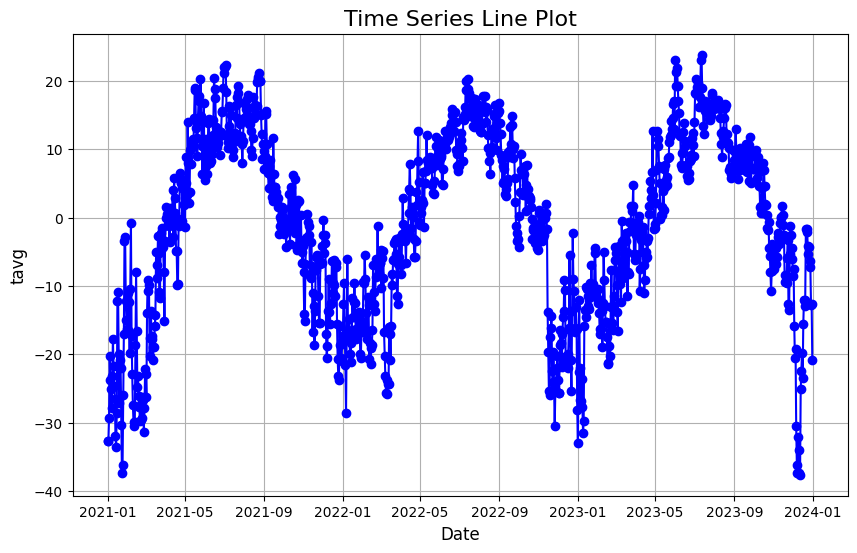

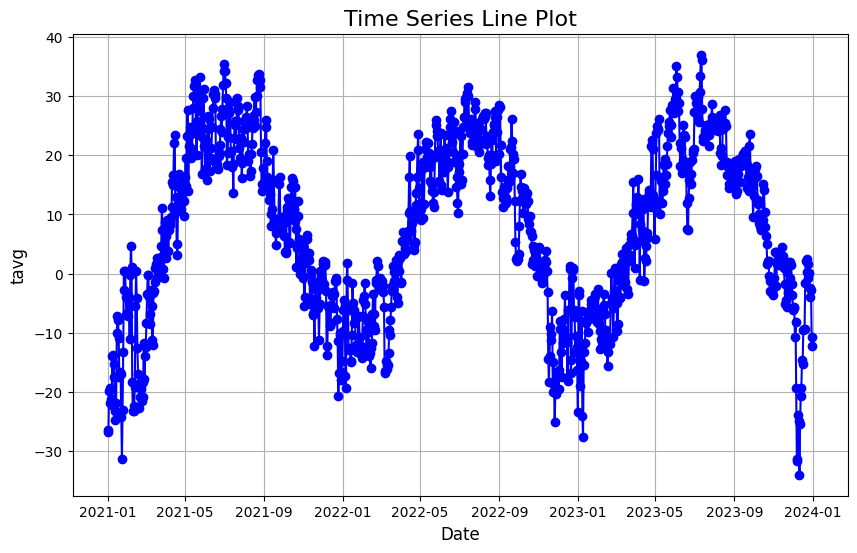

In [29]:
import matplotlib.pyplot as plt

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['tmin'], marker='o', linestyle='-', color='b')
plt.title("Time Series Line Plot", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("tavg", fontsize=12)
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['tmax'], marker='o', linestyle='-', color='b')
plt.title("Time Series Line Plot", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("tavg", fontsize=12)
plt.grid()
plt.show()

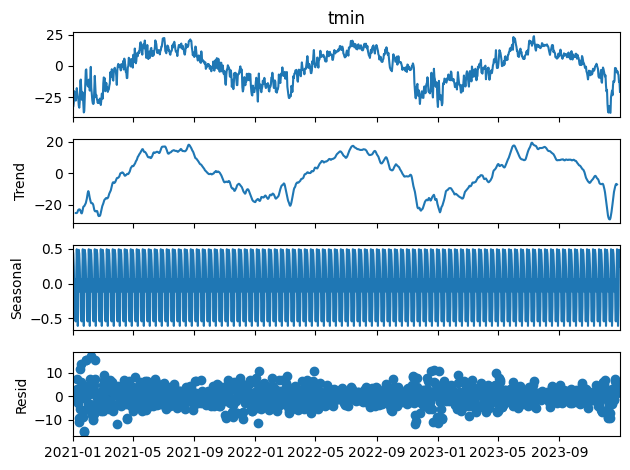

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['tmin'], model='additive', period=12)

# Plot decomposition
result.plot()
plt.show()

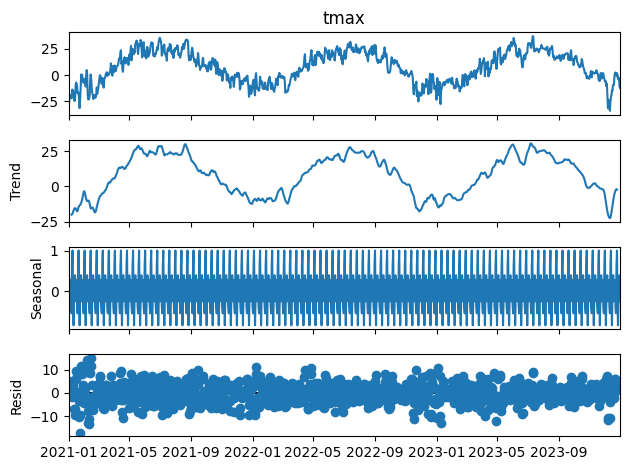

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['tmax'], model='additive', period=12)

# Plot decomposition
result.plot()
plt.show()

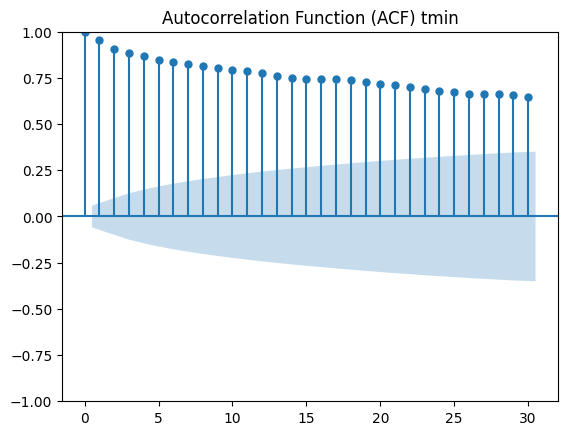

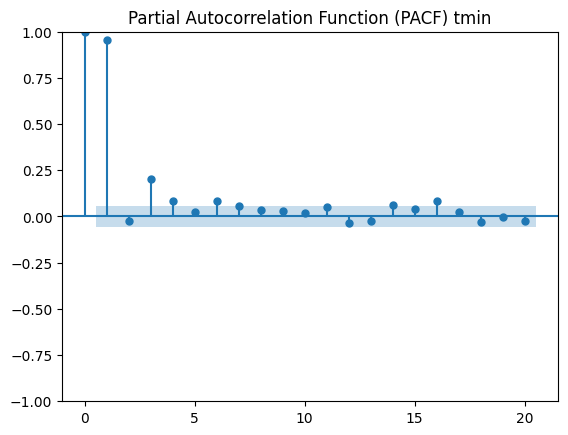

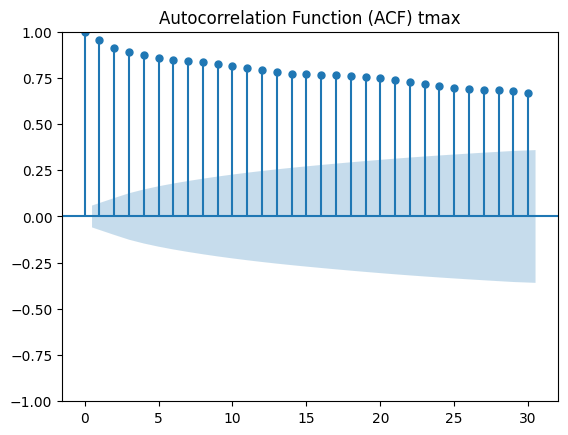

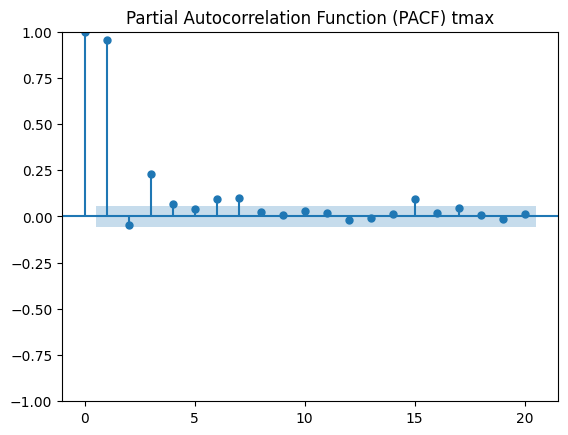

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

for col in data_columns: 
    # Plot the autocorrelation
    plot_acf(df[col], lags=30)  # lags=20 limits the number of lags shown
    plt.title(f"Autocorrelation Function (ACF) {col}")
    plt.show()
    
    # Plot the partial autocorrelation
    plot_pacf(df[col], lags=20, method='ywm')  # `method` specifies estimation method
    plt.title(f"Partial Autocorrelation Function (PACF) {col}")
    plt.show()

In [44]:
df["tmin"].corr(df["tmax"])

np.float64(0.9665376625399108)

mean rolling std 2.8873249410207182


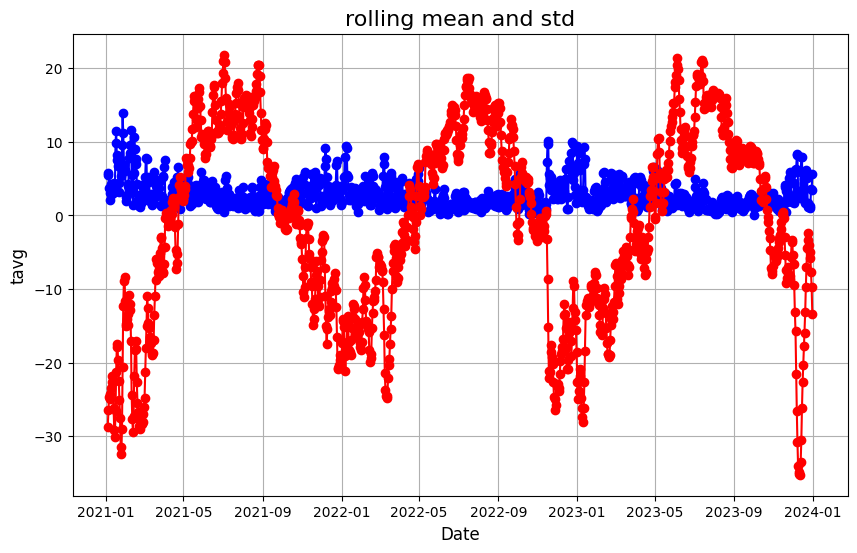

mean rolling std 3.149512466004861


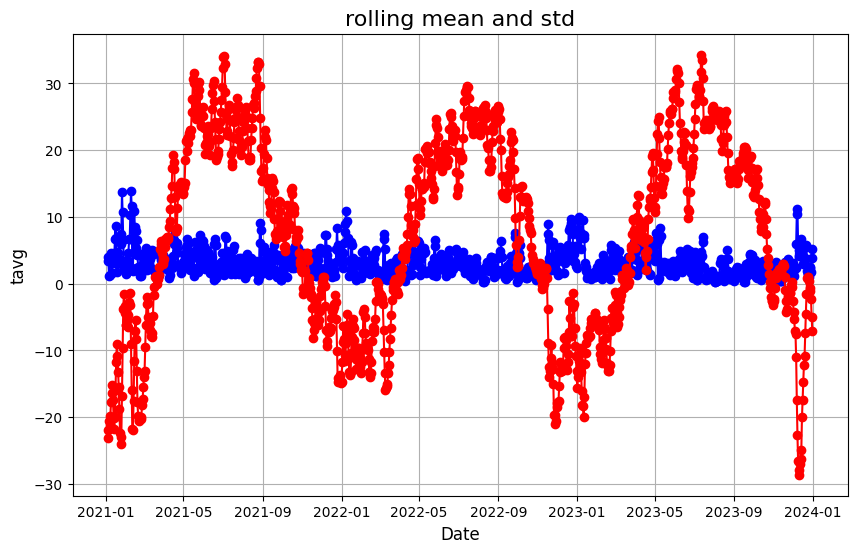

In [49]:
for col in data_columns:
    df[f'rolling_std_{col}'] = df[col].rolling(window=4).std()
    df[f'rolling_mean_{col}'] = df[col].rolling(window=4).mean()

    print("mean rolling std", df[f'rolling_std_{col}'].mean())
    
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[f'rolling_std_{col}'], marker='o', linestyle='-', color='b')
    plt.plot(df.index, df[f'rolling_mean_{col}'], marker='o', linestyle='-', color='r')
    plt.title("rolling mean and std", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("tavg", fontsize=12)
    plt.grid()
    plt.show()

In [60]:
lag_columns = []
for i in range(1, 3):
    df[f'tmax_lag{i}'] = df[f'tmax'].shift(i)

    lag_columns.append(f'tmax_lag{i}')


df.dropna(inplace=True, subset=lag_columns)

df.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,...,rolling_mean_tmax,tmax_lag1,tmax_lag2,tmax_lag3,tmax_lag4,tmax_lag5,tmax_lag6,tmax_lag7,tmax_lag8,tmax_lag9
date,,,,,,,,,,,,,,,,,,,,,
2021-01-21,-20.4,-22.0,-17.0,1.3,259.0,264.0,12.8,NaN,1009.8,NaN,...,-15.475,-16.6,-17.4,-10.9,-7.9,-7.1,-10.1,-21.9,-24.7,-23.3
2021-01-22,-26.9,-30.3,-24.3,0.0,259.0,311.0,10.1,NaN,1016.6,NaN,...,-18.825,-17.0,-16.6,-17.4,-10.9,-7.9,-7.1,-10.1,-21.9,-24.7
2021-01-23,-33.4,-37.3,-31.4,0.0,259.0,326.0,7.6,NaN,1034.7,NaN,...,-22.325,-24.3,-17.0,-16.6,-17.4,-10.9,-7.9,-7.1,-10.1,-21.9
2021-01-24,-29.1,-36.2,-23.1,0.5,259.0,155.0,12.3,NaN,1038.2,NaN,...,-23.950,-31.4,-24.3,-17.0,-16.6,-17.4,-10.9,-7.9,-7.1,-10.1
2021-01-25,-18.0,-25.9,-13.3,2.3,279.0,147.0,8.5,NaN,1030.2,NaN,...,-23.025,-23.1,-31.4,-24.3,-17.0,-16.6,-17.4,-10.9,-7.9,-7.1


In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

X = df[lag_columns]
y = df['tmax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Forecasting multiple steps ahead
forecast_horizon = 3  # Forecasting 3 steps ahead
predictions = []
for step in range(forecast_horizon):
    forecast = model.predict(X_test[step].reshape(1, -1))  # Predict next step
    predictions.append(forecast)

# Convert predictions to numpy array for further calculations
predictions = np.array(predictions)

# Now, calculate RMSE for each forecast horizon (1-step, 2-step, etc.)
rmse_list = []
for i in range(forecast_horizon):
    rmse = calculate_rmse(y_test[i], predictions[i])
    rmse_list.append(rmse)
    

# Print out the MSRE for each horizon
print(f"RMSE for each step: {rmse_list}")
print(f"Average RMSE across all forecast horizons: {np.mean(rmse_list)}")
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Temperature', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Temperature', color='red', linestyle='--')
plt.title("Gradient Boosting Model - Actual vs Predicted Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

KeyError: 0